#### Over the past few years, data-driven deep learning (DL) approaches have made impressive progress in the genomics field. The development of high-throughput technologies such as next-generation sequencing (NGS) has played a major part in this data-driven revolution. Several neural network (NN) architectures have found success in the genomics domain. For instance, in the previous chapters, we have seen feed-forward neural networks (FNNs), convolutional neural networks (CNNs), and recurrent neural networks (RNNs), which have been successfully used for many genomics applications. So far, all these NN architectures require that you have well-labeled data. However, a lack of ground truth and accurate labels is common in the genomics domain, which limits the application of supervised learning (SL) methods. NGS has significantly increased the use of gene expression assays, and there is so much genomics data out there with no label. Several methods exist to generate signals from these unlabeled datasets such as clustering, principal component analysis (PCA), multidimensional scaling (MDS), and so on, but integrative analysis involving multi-omics datasets is challenging with these conventional methods. Furthermore, in non-model species, the genome-wide gene expression analysis is very challenging because of the unavailability of gene function information and lack of knowledge of the organism’s biology. What we need are unbiased approaches that can find patterns in these large and complex unlabeled datasets in an unsupervised way.

##### Autoencoders are a type of NN architecture that can harness the power of DL in an unsupervised way. They are the most important NN architecture for unsupervised learning (UL). Unlike vanilla NN architectures, which model data by minimizing the loss between the predictions and original data, autoencoders try to learn an identity function that minimizes the loss function. Autoencoders have found a lot of success in several applications such as image compression, image denoising, image generation, recommendation system, sequence-to-sequence (seq2seq) prediction, and so on. In this chapter, you will understand what unsupervised DL is, why it is important, the different types of unsupervised DL methods, what autoencoders are, and, finally, the different applications of autoencoders in genomics. By the end of this chapter, you will know what unsupervised DL is, how autoencoders work, and the genomics applications of autoencoders.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781804615447/files/image/B18958_07_002.jpg)

#### PCA is a dimensionality reduction technique (DRT) that converts the input values into a few components that best represent the variance in the data and is mainly a linear transformation method.
#### An autoencoder, on the other hand, is a non-linear transformation method that uses a non-linear activation function and multiple NN layers to transform the data and compress it. Autoencoders are more efficient to learn model parameters because they use several layers, unlike PCA, which can learn from one huge transformation. Autoencoders can make use of pre-trained models that were trained and optimized on different datasets (a process termed transfer learning or TL), whereas PCA needs to be run every time on a new dataset.

##### The three main properties of autoencoders are 

- they are data-specific, 
- they are lossy, and 
- they learn automatically instead of being manually engineered by humans. Let’s look at this in more detail:

Autoencoders only work on the data on which they have been trained which means their behavior is data specific
Compared to the original input, the output from Autoencoders is always degraded and hence it is lossy
Similar to other DL models, Autoencoders learn features from the data automatically and so there is no need to extract features manually.

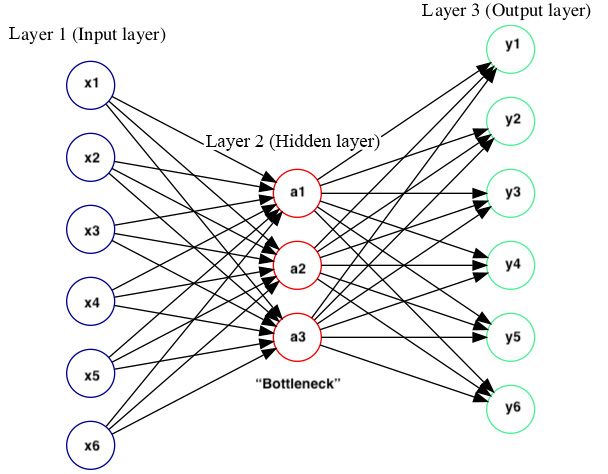

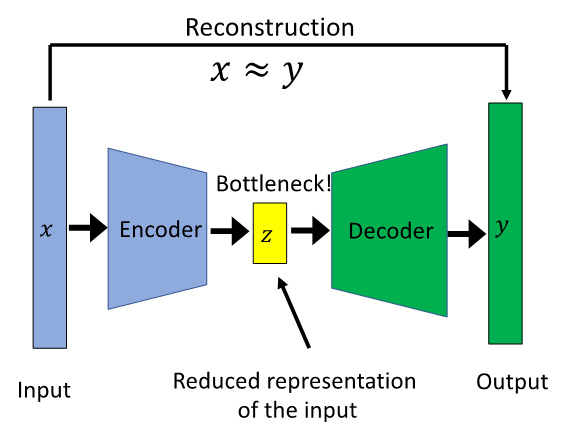

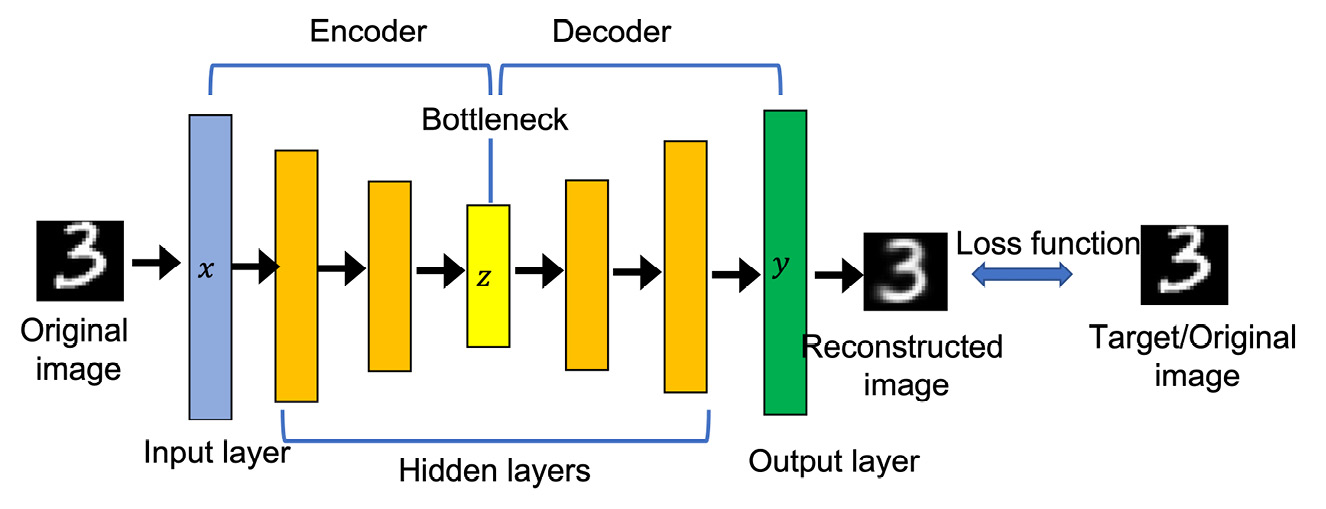

#### scRNA-seq
##### In the simplest use case, we want the autoencoder to take input data, learn a representation of the data in an unsupervised way, and output the data without noise or reconstruct the input as output. Let’s see an example of how it can be done in genomics. In a scRNA-seq technology, zero counts can arise either because of low mRNA capture rate (dropouts), due to experimental limitations, or because mRNAs are not expressed in that cell type (structural zeros). The main challenge while doing scRNA-seq data analysis is deciding which genes are zero counts due to dropouts versus structural zeros. Several methods exist to address this issue, such as imputation, which relies on correlation structure between the cells and genes to differentiate dropouts from structural zeros. We can treat this as a denoising problem and try to denoise the gene expression data to remove any background noise (dropouts) so that only structural zeros are present.

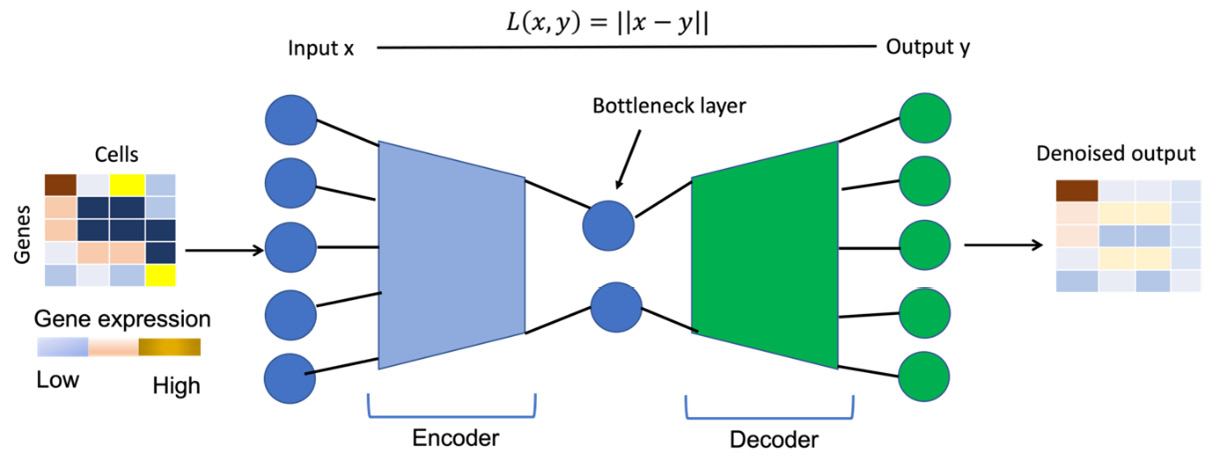

##### The input as shown above is a gene expression matrix consisting of cells as columns and genes as rows. In this example, we have five genes, and each gene has expression values from each of the five cell types. The dark-colored boxes indicate zero counts. During the training of an autoencoder, we pass this gene expression matrix in the input layer (five nodes here represent five genes), which are then passed to the Encoder block. The output from the Encoder block is the reduced representation in the bottleneck layer, and finally, the decoder reconstructs the original input from bottleneck layer. The output layer also has a similar number of nodes to the input (five), and it may contain values of the mean of the negative binomial distribution and the final output matrix that shows the denoised expression.

#### Regularized autoencoders
So far, we have seen autoencoders that work mainly by placing constraints in the network so that they can learn the useful structure from the data. Instead of putting constraints on the model capacity by keeping the encoder and decoder shallow and the bottleneck layer small, we can impose sparsity in the hidden layers even if the number of hidden units is larger. So, how do we do that in the network? It is mainly done through regularization (such as in SL). There are three different types of regularized autoencoders—sparse autoencoders, contractive autoencoders, and denoising autoencoders.

A sparse autoencoder is a type of regularized autoencoder that doesn’t put any constraints on the number of nodes in the hidden layer. Instead, it penalizes the activations within a layer. This is different from traditional regularization methods such as Lasso and Ridge where we penalize the weights of the edges. This way, we encourage only a certain number of nodes in the encoder and decoder blocks.

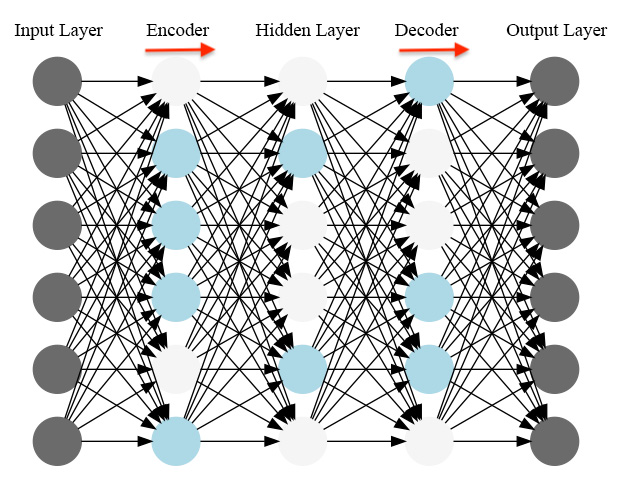

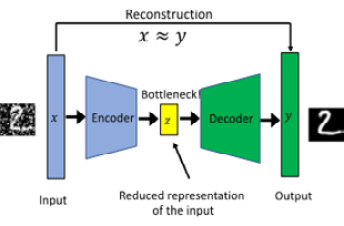

#### A denoising autoencoder introduces artificial noise (by converting some inputs into zeros) in the data so that the autoencoder doesn’t just copy the data as output without learning any structure of the data. The goal of denoising autoencoders is to recover the undistorted input, as shown in Figure 7.9. In this case, the autoencoder learns an approximation mapping function toward a lower dimension that best describes the natural data without any noise. The loss function tries to reduce the output and the noise input. Denoising autoencoders are a very popular type of autoencoder and are mainly used in image denoising to remove any unwanted noise in images and remove dropouts (non-zeros introduced to a low RNA capture rate) in scRNA-seq data. We have seen an example of this in the previous section:

##### Gene expression
The main application of autoencoders, as you learned in the previous section, is for gene expression analysis, which includes

- Time-series gene expression where they are mainly used at the preprocessing step for clustering, cDNA microarrays
- RNA-Seq, where they are used to predict the organization of transcriptomics machinery
- Gene expression, where they are mainly used for identification of biological signals and patterns respectively

### Use case – Predicting gene expression from TCGA pan-cancer RNA-Seq data using denoising autoencoders
##### Gene expression analysis is a typical use case in the genomics domain. Gene expression can reveal a lot of biological insights about the state of the cell, tissue, or condition. Currently, a lot of techniques, both traditional and non-traditional, are available for gene expression predictions. Autoencoders, because of their ability to reconstruct data, were proven successful previously to extract novel biological insights from gene expression data. With that goal in mind, in this current use case, we will train an autoencoder from The Cancer Genome Atlas (TCGA) pan-cancer RNA-Seq data.